<a href="https://colab.research.google.com/github/matheusfigueiredoo/detection-of-cyber-attacks/blob/main/%5B3%5D_legitimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi-Layer Perceptron

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#train = pd.read_csv("drive/MyDrive/MQTTset/train70_augmented.csv", nrows=1000000)
#test = pd.read_csv("drive/MyDrive/MQTTset/test30_augmented.csv", nrows=200000)

train = pd.read_csv("train70_augmented.csv", nrows=5000000)

In [ ]:
train = pd.DataFrame(train)

In [ ]:
# distribuição das targets

print("Train: \n", train['target'].value_counts(), "\n")

Train: 
 target
legitimate    2499426
malformed      500978
bruteforce     500848
slowite        500570
flood          499314
dos            498864
Name: count, dtype: int64 



In [ ]:
# divisão de nomes das targets para legitimate e malicious

for i in train.index:
    if train['target'][i] != 'legitimate':
        train.at[i, 'target'] = 'malicious'

# nova distribuição das targets

print("Train: \n", train['target'].value_counts(), "\n")

Train: 
 target
malicious     2500574
legitimate    2499426
Name: count, dtype: int64 



In [ ]:
# três primeiras linhas

print(train['target'][:3], "\n")

0    legitimate
1     malicious
2     malicious
Name: target, dtype: object 



In [ ]:
# pre processamento de dados
# separacao de features e targets

from sklearn.model_selection import train_test_split

# ajuste de features e targets

features = train.iloc[:,:-1]
target = train['target']

In [ ]:
# transformacao de targets categoricas em numeros inteiros

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(target)
label.transform(target)

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
# ajuste de variáveis categóricas

features = pd.get_dummies(features)

print(features.shape)

(5000000, 44)


In [ ]:
# 'col' sao as features categoricas com valores True/False

col = ['tcp.flags_0x00000002',
       'tcp.flags_0x00000004', 'tcp.flags_0x00000010', 'tcp.flags_0x00000011',
       'tcp.flags_0x00000012', 'tcp.flags_0x00000014', 'tcp.flags_0x00000018',
       'tcp.flags_0x00000019', 'mqtt.conack.flags_0',
       'mqtt.conack.flags_0x00000000', 'mqtt.hdrflags_0',
       'mqtt.hdrflags_0x00000010', 'mqtt.hdrflags_0x00000020',
       'mqtt.hdrflags_0x00000030', 'mqtt.hdrflags_0x00000031',
       'mqtt.hdrflags_0x00000032', 'mqtt.hdrflags_0x0000003a',
       'mqtt.hdrflags_0x00000040', 'mqtt.hdrflags_0x00000050',
       'mqtt.hdrflags_0x00000082', 'mqtt.hdrflags_0x00000090',
       'mqtt.hdrflags_0x000000c0', 'mqtt.hdrflags_0x000000d0',
       'mqtt.hdrflags_0x000000e0', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']

In [ ]:
# substituicao dos valores True/False por 1/0 respectivamente

features[col] = features[col].replace({True: 1, False: 0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
# normalização dos dados
# seleção de features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=20)

pca.fit(X_train)
pca.fit(X_test)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# multi-layer perceptron

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', shuffle=True, random_state=0, alpha=0.00000001, hidden_layer_sizes=44)

clf.fit(X_train, y_train)

# predição de valores

predict = clf.predict(X_test)

print("Accuracy train: {}".format(clf.score(X_train, y_train)))
print("Accuracy test: {}".format(clf.score(X_test, y_test)))

Accuracy train: 0.806664
Accuracy test: 0.8069864


In [ ]:
# metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

  legitimate       0.72      1.00      0.84    625548
   malicious       1.00      0.61      0.76    624452

    accuracy                           0.81   1250000
   macro avg       0.86      0.81      0.80   1250000
weighted avg       0.86      0.81      0.80   1250000



In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predict)
print(matrix)

[[625514     34]
 [241233 383219]]


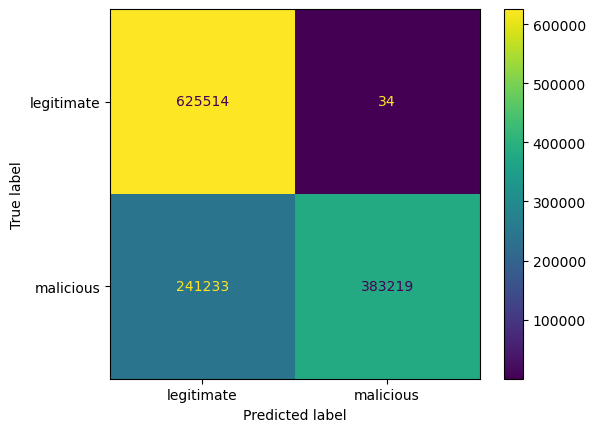

In [ ]:
# display matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()